In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Decision Tree

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
tree = DecisionTreeClassifier(random_state = 50)

In [4]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=50)

In [5]:
predictions = tree.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
print(accuracy_score(y_test, predictions))

0.872


### Bagging

In [9]:
from sklearn.ensemble import BaggingClassifier

In [18]:
bag = BaggingClassifier(
        DecisionTreeClassifier(),  # Classifier
        n_estimators=1000,         # Number of instances of the estimator
        max_samples=100,           # Maximum samples to take
        bootstrap=True,            # Bagging mode set
        random_state=55    
)

In [19]:
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=1000, random_state=55)

In [20]:
predictions = bag.predict(X_test)

In [21]:
print(accuracy_score(y_test, predictions))

0.92


In [22]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

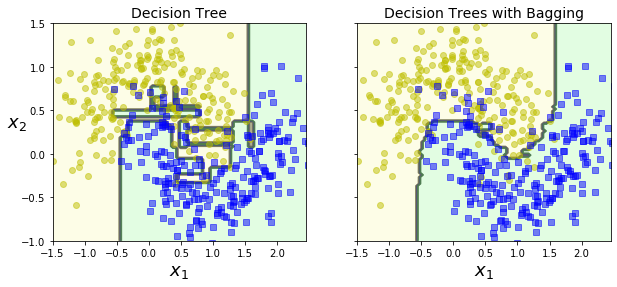

In [23]:
import matplotlib.pyplot as plt
import numpy as np
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
plt.show()